# Yellow Brick kütüphanesiyle ile kümeleme 

# kütüphaneleri yükle veya içe aktar

#pip install yellowbrick

In [11]:
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.metrics import silhouette_score
import seaborn as sns

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


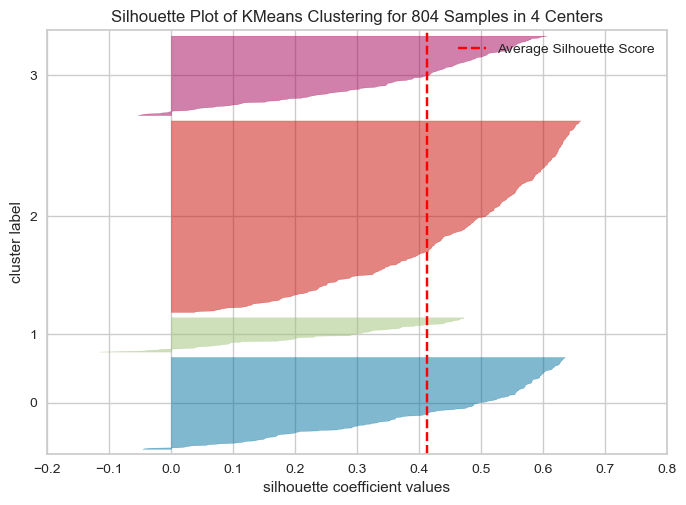

In [6]:
df=pd.read_excel('cars.xls')
X=df[['Price','Mileage','Cylinder']]

#build model
model=KMeans(n_clusters=4,random_state=42)
visualizer=SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(X)
visualizer.show();

In [9]:
wcss = [] # Within-Cluster-Sum-of-Squares
import warnings
warnings.filterwarnings('ignore')
ss=[]
for i in range(2, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    ss.append(silhouette_score(X, kmeans.predict(X)))

<Axes: >

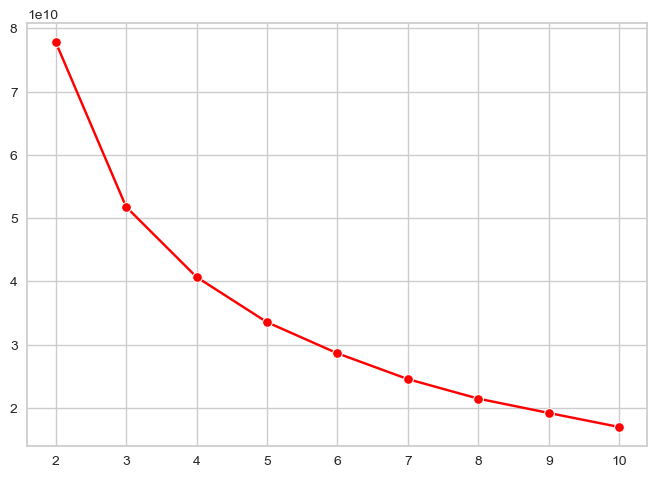

In [12]:
sns.lineplot(x=range(2, 11), 
             y=wcss, marker='o', color='red')

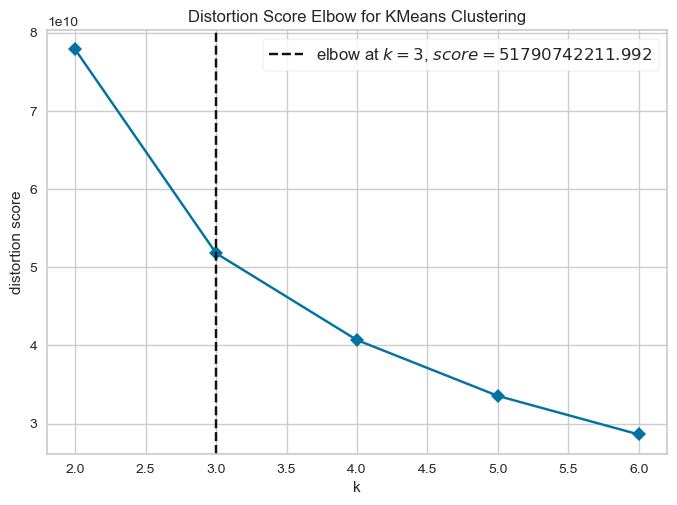

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [17]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(random_state=42)

visualizer = KElbowVisualizer(model, k=(2,7), 
                              metric='distortion', 
                              timings=False)

visualizer.fit(X)  
visualizer.show()
